In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('updated_dataset.csv')

In [3]:
param = df[['Time_taken(min)',
       'Number of calls', 'Politeness', 'Freshness ', 'Temperature',
       'Maximum wait time']].to_numpy()

In [4]:
# update - updates which are done in ratings on a scale on 1000. Will be scaled down to 1 eventually
update = np.empty((45593, 1), dtype = float)
for i in range(0, len(param)):
    update[i] = 10 * (param[i][5] - param[i][0]) + 5 * param[i][2] + 7 * param[i][3] + param[i][4] * 6 + 4 * param[i][1]
    
update.shape

(45593, 1)

In [5]:
# Normalizing Customer Ratings
# Using Min-Max Normalization

normal_update = np.empty((45593, 1), dtype = float)
m = max(update)
n = min(update)
for i in range(0, len(param)):
    normal_update[i] = (m - update[i]) / (m - n)
    normal_update[i] = normal_update[i] * 5
    
# print(normal_update)
# print(max(normal_update))
# print(min(normal_update))

In [6]:
# Created in replacement of the Deliver_person_ID
id = np.empty((45593, 1), dtype = int)
for i in range(0, len(id)):
    id[i] = i + 1

In [7]:
rat = df['Delivery_person_Ratings'].to_numpy()
rat = rat.astype(np.float64)
# print(rat.dtype)

In [8]:
df['normal_update'] = normal_update

In [14]:
# Finding p factor
p = df['Weight_1'] * df['Order_1'] + df['Weight_2'] * df['Order_2'] + df['Weight_3'] * df['Order_3'] + df['WeightA_1'] * df['Active_1'] + df['WeightA_2'] * df['Active_2'] + df['WeightA_3'] * df['Active_3']

In [15]:
# Finding factor a

a = df['order_history_weight'] * p + df['rating_weight'] * df['normal_update']

In [16]:
print(max(a))
print(min(a))

26619.871570851163
2.170788613


In [51]:
for i in range(0, len(param)):
    update[i] = update[i] + (a[i] / 100000)
    
m = max(update)
n = min(update)
for i in range(0, len(param)):
    normal_update[i] = (m - update[i]) / (m - n)
    normal_update[i] = normal_update[i] * 5
    
df['normal_update'] = normal_update


In [83]:
# Updated Ratings of the rider
updated_ratings = np.empty((45593, 1), dtype = float)
for i in range(0, len(update)):
    updated_ratings[i] = rat[i] + (normal_update[i] / 10)
    if updated_ratings[i] > 5:
        updated_ratings[i] = 5
df['updated_ratings'] = updated_ratings

In [84]:
import random

In [99]:
sample_size = 15
# Fix the indexes

In [102]:
# Sampling without replacement
sample = df.sample(n = sample_size)
# sample = sample.sort_values(by = ['updated_ratings'])

id = np.empty((sample_size, 1), dtype = int)
for i in range(0, len(id)):
    id[i] = i + 1
sample['id'] = id
# data_sorted = sorted(zip(x, y), key=lambda x: x[1])
# sample

       Unnamed: 0       ID Delivery_person_ID  Delivery_person_Age  \
11059       11059  0x8941    COIMBRES15DEL03                    28   
35194       35194  0x92c8      MYSRES16DEL01                    27   
35507       35507   0x483      JAPRES11DEL01                     0   
6114         6114  0x8ea9     CHENRES02DEL02                    27   
24227       24227  0xb213      JAPRES15DEL02                    37   
539           539  0x28e9      HYDRES03DEL02                    31   
25884       25884  0x9757     CHENRES03DEL02                    36   
14572       14572  0x684c      MUMRES13DEL03                    36   
14503       14503  0x2ea0      MYSRES09DEL02                    25   
29564       29564  0x9539   RANCHIRES13DEL01                    37   
21311       21311  0x29d7      JAPRES19DEL03                    39   
20297       20297  0xb809    COIMBRES12DEL03                    27   
22118       22118  0x4b58   RANCHIRES08DEL03                    39   
15785       15785  0

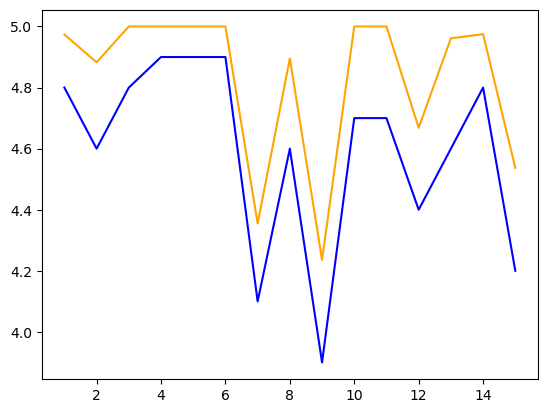

In [101]:
# Printing Line Chart
plt.plot(sample['id'], sample['Delivery_person_Ratings'], color = 'blue')
plt.plot(sample['id'], sample['updated_ratings'], color = 'orange')

In [88]:
# Calculating the sigmoid
def sigmoid (value):
    return 1 / (1 + np.exp(-value))

In [89]:
Price = 1000
min_bid = 100
max_bid = 200
((max(sigmoid(updated_ratings / 5)) - 0.5) / 0.5) * 100 + 100

array([146.21171573])

In [90]:
bid = np.empty((45593, 1), dtype = float)
for i in range(0, len(bid)):
    x = np.tanh(updated_ratings[i])
    x = (x - 0.5) / 0.5
    bid[i] = x * (max_bid - min_bid) + min_bid
#     bid[i] = sigmoid(bid[i])
    
print(max(bid))

# bid = bid - min(bid)
bid = bid / max(bid)
bid = bid * max_bid

print(max(bid))
print(min(bid))
# for i in range(0, len(bid)):
#     bid[i] = bid[i] - min(bid)
#     bid[i] 

# bid = scaler.fit_transform(bid.reshape(-1, 1)).ravel()
# print(max(bid))
# print(min(bid))
# bid = sigmoid(bid)
# print(max(bid))
# print(min(bid))
# bid = (bid - 0.5) / 0.5
# print(max(bid))
# print(min(bid))
# bid = scaler.inverse_transform(bid.reshape(-1, 1)).ravel()

# print(max(bid))
# print(min(bid))

# a = (max_bid - min_bid) / (max(bid) - min(bid))
# b = min_bid - a * min(bid)

# for i in range(0, len(bid)):
#     bid[i] = a * bid[i] + b

[199.98184085]
[200.]
[1.92049939]


In [91]:
# Calculating the sigmoid of the update obtained in rating after applying the algorithm
percent_increase = np.empty((45593, 1), dtype = float)
for i in range(0, len(percent_increase)):
#     percent_increase[i] = sigmoid(updated_ratings[i] - rat[i])
    percent_increase[i] = sigmoid(updated_ratings[i])

In [92]:
# machine_bid indicating the bid predicted by the machine1
# Reason for 0.50. Machine predicted 
machine_bid = np.empty((45593, 1), dtype = float)
machine_bid = bid
c = 0
d = 0
# for i in range(0, len(machine_bid)):
# #     if percent_increase[i] > 0.5:
#     machine_bid[i] = df['initial_bid'][i] * (1 + percent_increase[i])
#     elif percent_increase[i] == 0.5:
#         machine_bid[i] = df['initial_bid'][i]
#         d = d + 1
#     else:
#         machine_bid[i] = df['initial_bid'][i] - df['initial_bid'][i] * percent_increase[i]
#         c = c + 1

In [93]:
df['machine_bid'] = machine_bid

In [94]:
sample_size = len(df)
sample = df.sample(n = sample_size)

# change refers to the change in the rating of the rider

id = np.empty((sample_size, 1), dtype = int)
for i in range(0, len(id)):
    id[i] = i + 1
sample['id'] = id
sample['change'] = sample['updated_ratings'] - sample['Delivery_person_Ratings']
sample = sample.sort_values(by = ['change'])
# data_sorted = sorted(zip(x, y), key=lambda x: x[1])
# sample

Text(0, 0.5, 'Machine Predicted Bid')

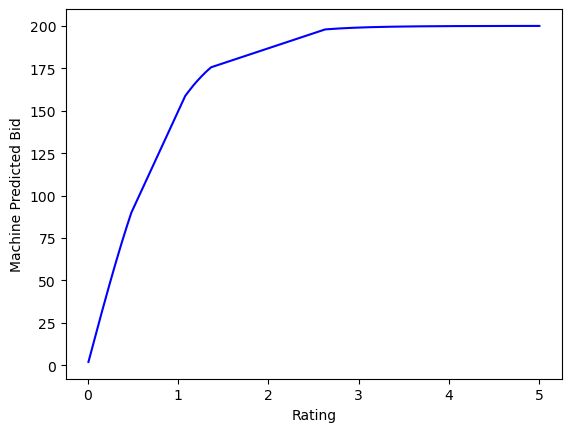

In [95]:
# x = sample('updated_ratings')
sample = sample.sort_values(by = 'updated_ratings')
plt.plot(sample['updated_ratings'], sample['machine_bid'], color = 'blue')
plt.xlabel('Rating')
plt.ylabel('Machine Predicted Bid')

In [20]:
import pandas as pd
import pickle as pkl
import numpy as np

def machine_predicted_bid(filename):
    data = pd.read_pickle(filename)
    order = data['order_cost']
    # data['Time_Orderd'] = pd.to_datetime(data['Time_Orderd'])
    date_1970 = data.iat[0,10].replace(
        day=1,
        month=1,
        year=1970,

    )
    # - np.datetime64('1970-01-01T00:00:00Z')
    # data['order_pick'] = (data['order_pick']) / np.timedelta64(1, 's')
    # data['Time_place'] = (data['Time_place']) / np.timedelta64(1, 's')
    wait_time = data['Time_pick'] - data['order_place'] + pd.Timedelta(minutes=45)
    
    update = np.empty((len(data), 1), dtype = float)
    
    for i in range(0, len(data)):
        update[i] = 10 * wait_time[i]
        
    normal_update = np.empty((len(data), 1), dtype = float)
    
    m = max(update)
    n = min(update)
    
    for i in range(0, len(data)):
        normal_update[i] = (m - update[i]) / (m - n)
        normal_update[i] = normal_update[i] * 5
                             
    id = np.empty((len(data), 1), dtype = int)
    
    for i in range(0, len(id)):
        id[i] = i + 1
    
    data['ID'] = id
    data['normal_update'] = normal_update
    
    # Finding p factor
    p = data['Weight_1'] * data['Order_1'] + data['Weight_2'] * data['Order_2'] + data['Weight_3'] * data['Order_3'] + data['WeightA_1'] * data['Active_1'] + data['WeightA_2'] * data['Active_2'] + data['WeightA_3'] * data['Active_3']
    
    # Finding factor a
    a = data['order_history_weight'] * p + data['rating_weight'] * data['normal_update']
    
    for i in range(0, len(data)):
        update[i] = update[i] + (a[i] / 100000)
    
    for i in range(0, len(data)):
        normal_update[i] = (m - update[i]) / (m - n)
        normal_update[i] = normal_update[i] * 5

    data['normal_update'] = normal_update
    
    # Updated Ratings of the rider
    updated_ratings = np.empty((len(data), 1), dtype = float)
    
    for i in range(0, len(update)):
        updated_ratings[i] = rat[i] + (normal_update[i] / 10)
        if updated_ratings[i] > 5:
            updated_ratings[i] = 5
    
    data['updated_ratings'] = updated_ratings
    sample_size = 15
    
    # Sampling without replacement
    sample = data.sample(n = sample_size)
    
    id = np.empty((sample_size, 1), dtype = int)
    
    for i in range(0, len(id)):
        id[i] = i + 1
    
    sample['id'] = id
    
    # Printing Line Chart
    # plt.plot(sample['id'], sample['Delivery_person_Ratings'], color = 'blue')
    # plt.plot(sample['id'], sample['updated_ratings'], color = 'orange')
    
    bid = np.empty((len(data), 1), dtype = float)
    
    for i in range(0, len(bid)):
        x = sigmoid(updated_ratings[i])
        x = (x - 0.5) / 0.5
        bid[i] = x * (max_bid(order) - min_bid(order)) + min_bid(order)
    
    bid = bid / max(bid)
    bid = bid * max_bid(order)
    
    df['machine_bid'] = bid
    
    sample_size = len(data)
    sample = df.sample(n = sample_size)

    # change refers to the change in the rating of the rider

    id = np.empty((sample_size, 1), dtype = int)
    
    for i in range(0, len(id)):
        id[i] = i + 1
    
    sample['id'] = id
    sample['change'] = sample['updated_ratings'] - sample['Delivery_person_Ratings']
    sample = sample.sort_values(by = ['change'])

    return bid

In [21]:
# Calculating the sigmoid
def sigmoid (value):
    return 1 / (1 + np.exp(-value))

In [22]:
machine_predicted_bid('../data/mumbai_7_days_data.pkl')

KeyError: 'Time_pick'